# End-To-End Machine Learning Project With Real World Data

## Steps of This Project

* **Problem Definition**
* **Gathering Data:** After the problem definition, we need to obtain data which will be appropriate for our case. The quality and quantity of data that you gather will directly determine how good our predictive model can be
* **Exploratory Data Analysis:** Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
* **Preprocess the Data:** Data preparation, where we load our data into a suitable place and prepare it for use in our machine learning training. This is also a good time to do any pertinent visualizations of your data, to help you see if there are any relevant relationships between different variables you can take advantage of, as well as show you if there are any data imbalances
* **Choosing Right ML Models**
* **Training**
* **Prediction**

## Imports

In [ ]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(rc={'figure.figsize':(20,10)})

## Gathering Data

In this real-life example, we are going to predict the price of a house according to Melbourne Housing data set. Before predicting any price, first, we begin with analyzing the data using preprocessing techniques.

In [ ]:
data = pd.read_csv("Melbourne_housing.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Exploratory Data Analysis & Preprocessing The Data

We oftenly use EDA for preprocessing the data for analysing and training

In [ ]:
data.shape

(14811, 20)

In [ ]:
data.size

296220

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14811 entries, 0 to 14810
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         14811 non-null  object 
 1   Address        14811 non-null  object 
 2   Rooms          14811 non-null  int64  
 3   Type           14811 non-null  object 
 4   Price          11531 non-null  float64
 5   Method         14811 non-null  object 
 6   SellerG        14811 non-null  object 
 7   Date           14811 non-null  object 
 8   Distance       14810 non-null  float64
 9   Postcode       14810 non-null  float64
 10  Bathroom       11635 non-null  float64
 11  Car            11635 non-null  float64
 12  Landsize       11617 non-null  float64
 13  BuildingArea   6362 non-null   float64
 14  YearBuilt      7310 non-null   float64
 15  CouncilArea    14810 non-null  object 
 16  Lattitude      11739 non-null  float64
 17  Longtitude     11739 non-null  float64
 18  Region

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,14811.0,2.903045e+00,0.986977,1.00000,2.00000,3.0000,3.000000e+00,1.200000e+01
Price,11531.0,1.073550e+06,658045.006530,85000.00000,636250.00000,895000.0000,1.330000e+06,8.000000e+06
Distance,14810.0,8.823410e+00,3.954550,1.20000,5.90000,8.9000,1.140000e+01,4.590000e+01
Postcode,14810.0,3.099805e+03,66.076277,3000.00000,3046.00000,3087.0000,3.146000e+03,3.978000e+03
Bathroom,11635.0,1.534852e+00,0.717582,0.00000,1.00000,1.0000,2.000000e+00,1.200000e+01
Car,11635.0,1.546884e+00,0.964969,0.00000,1.00000,1.0000,2.000000e+00,2.600000e+01
Landsize,11617.0,4.745416e+02,1169.550990,0.00000,146.00000,359.0000,6.290000e+02,7.510000e+04
BuildingArea,6362.0,1.476487e+02,140.962865,0.00000,90.00000,125.0000,1.760000e+02,6.791000e+03
YearBuilt,7310.0,1.960694e+03,38.025214,1800.00000,1930.00000,1965.0000,1.998000e+03,2.106000e+03
Lattitude,11739.0,-3.781169e+01,0.062479,-38.18163,-37.85465,-37.8092,-3.776440e+01,-3.749642e+01


In [ ]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

### Convert objects to categorical values

We can change the type of each column as we desired. It is important to change these columns' type according to how we will use them.

In [ ]:
# Convert objects to categorical variables
object_columns = data.select_dtypes("object").columns

# Car and Bathroom are integer but also categorical values
object_columns = np.append(object_columns,"Car")
object_columns = np.append(object_columns,"Bathroom")

print(object_columns)

['Suburb' 'Address' 'Type' 'Method' 'SellerG' 'Date' 'CouncilArea'
 'Regionname' 'Car' 'Bathroom']


In [ ]:
for colname in object_columns:
    data[colname] = data[colname].astype('category')  

# Check it worked
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14811 entries, 0 to 14810
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         14811 non-null  category
 1   Address        14811 non-null  category
 2   Rooms          14811 non-null  int64   
 3   Type           14811 non-null  category
 4   Price          11531 non-null  float64 
 5   Method         14811 non-null  category
 6   SellerG        14811 non-null  category
 7   Date           14811 non-null  category
 8   Distance       14810 non-null  float64 
 9   Postcode       14810 non-null  float64 
 10  Bathroom       11635 non-null  category
 11  Car            11635 non-null  category
 12  Landsize       11617 non-null  float64 
 13  BuildingArea   6362 non-null   float64 
 14  YearBuilt      7310 non-null   float64 
 15  CouncilArea    14810 non-null  category
 16  Lattitude      11739 non-null  float64 
 17  Longtitude     11739 non-null  

### Removing Duplicates


Duplicated and drop_duplicates method get a parameter called subset. If its needed to check duplicates specific for a column then you can use duplicated(subset=[column names]) for check and
drop_duplicates(subset=[columns names]) for drop

In [ ]:
# Check for duplicate data
duplicate = data.duplicated()
print(duplicate.sum())

0


In [ ]:
data[duplicate]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [ ]:
data.drop_duplicates(inplace=True, keep="first")
data.duplicated().sum()

0

### Outliers Detection

Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.

In [ ]:
# Check min, max and mean of values to ensure it makes sense
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,14811.0,2.903045e+00,0.986977,1.00000,2.00000,3.0000,3.000000e+00,1.200000e+01
Price,11531.0,1.073550e+06,658045.006530,85000.00000,636250.00000,895000.0000,1.330000e+06,8.000000e+06
Distance,14810.0,8.823410e+00,3.954550,1.20000,5.90000,8.9000,1.140000e+01,4.590000e+01
Postcode,14810.0,3.099805e+03,66.076277,3000.00000,3046.00000,3087.0000,3.146000e+03,3.978000e+03
Landsize,11617.0,4.745416e+02,1169.550990,0.00000,146.00000,359.0000,6.290000e+02,7.510000e+04
BuildingArea,6362.0,1.476487e+02,140.962865,0.00000,90.00000,125.0000,1.760000e+02,6.791000e+03
YearBuilt,7310.0,1.960694e+03,38.025214,1800.00000,1930.00000,1965.0000,1.998000e+03,2.106000e+03
Lattitude,11739.0,-3.781169e+01,0.062479,-38.18163,-37.85465,-37.8092,-3.776440e+01,-3.749642e+01
Longtitude,11739.0,1.449912e+02,0.077399,144.54468,144.94020,144.9981,1.450474e+02,1.455264e+02
Propertycount,14810.0,7.463309e+03,4413.029885,389.00000,4442.00000,6567.0000,1.033100e+04,2.165000e+04


In [ ]:
# Landsize and Build Area cannot be 0 or negative. Convert them to nan
data.loc[data["Landsize"] <= 0, "Landsize"] = np.nan
data.loc[data["BuildingArea"] <= 0, "BuildingArea"] = np.nan

In [ ]:
# Remove false YearBuilt (Melbourne Founded 1835)
data.drop(data.loc[data['YearBuilt'] < 1835].index, inplace=True)

In [ ]:
# Adding feature for house age 
data['Age'] = 2021 - data['YearBuilt']
data.drop(data.loc[data["Age"]<0].index, inplace=True)

In [ ]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,121.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,2.0,1.0,NaN,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,121.0


In [ ]:
data = data.drop(['YearBuilt'], axis = 1)

In [ ]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,1.0,1.0,126.0,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,121.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,2.0,1.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,121.0


### Outliers Detection with z score
The further away an observation’s Z-score is from zero, the more unusual it is. If the z score of a variable in the dataset is more than 3 or less than -3, then we can say that the variable has an outlier value.

  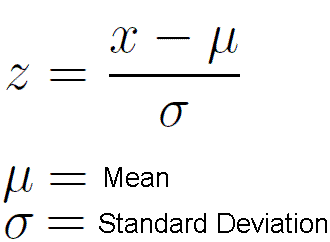

The figure above shows how to calculate the z score of a variable

In [ ]:
numerical_columns = data.select_dtypes("float64", "int64").columns  # finds the integer and float columns in the datasets

In [ ]:
for column in numerical_columns:  # iterate columns one by one
  sns.histplot(data[column], ax=axes[counter, 0], kde=True)
 
  max_value = (3*data[column].std()) + data[column].mean()  # finds the max value that is not going to be called not an outlier
  min_value = -((3*data[column].std()) + data[column].mean())  # finds the min value that is not going to be called not an outlier

  mean = data.loc[(data[column] > min_value) & (data[column] < max_value), column].mean()  # calculate the new mean of the column without the outlier values
  # if there is no outlier value then the mean will be np.nan in this situation don't need to do imputation
  if mean is not np.nan:  
    data.loc[(data[column] < min_value) | (data[column] > max_value), column] = mean  # change outlier values with mean
    data[column].fillna(mean, inplace=True)  # also fill nan values with mean
  else:  # this condition means there is no outlier value in the column
    data[column].fillna(data[column].mean(), inplace=True)  # just fill nan values with mean

  sns.histplot(data[column], ax=axes[counter, 1], kde=True)
  axes[counter, 0].set_title(f"{column} Before", fontsize=25)
  axes[counter, 1].set_title(f"{column} After", fontsize=25)
  counter +=1

In [ ]:
data.shape

(14808, 20)

### Handling missing values

In [ ]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom         3176
Car              3176
Landsize            0
BuildingArea        0
CouncilArea         1
Lattitude           0
Longtitude          0
Regionname          1
Propertycount       0
Age                 0
dtype: int64

In [ ]:
# Percentage of Missings in each columns
data.isnull().sum()/len(data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bathroom         21.447866
Car              21.447866
Landsize          0.000000
BuildingArea      0.000000
CouncilArea       0.006753
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.006753
Propertycount     0.000000
Age               0.000000
dtype: float64

In [ ]:
# Imputation method for categorical variables (we cannot use z score for string values)
categorical_columns = data.select_dtypes("category")
categorical_columns

,Suburb,Address,Type,Method,SellerG,Date,Bathroom,Car,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,3/09/2016,1.0,1.0,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,1.0,1.0,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,1.0,0.0,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,4/02/2016,2.0,1.0,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,2.0,0.0,Yarra City Council,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...
14806,Brighton East,3 Bown Ct,h,PI,Hodges,3/06/2017,3.0,2.0,Bayside City Council,Southern Metropolitan
14807,Brighton East,27 Creswick St,h,SN,Nick,3/06/2017,2.0,2.0,Bayside City Council,Southern Metropolitan
14808,Brighton East,29 Edro Av,h,PN,Follett,3/06/2017,NaN,NaN,Bayside City Council,Southern Metropolitan
14809,Brighton East,9 Hope St,h,PI,Marshall,3/06/2017,NaN,NaN,Bayside City Council,Southern Metropolitan


In [ ]:
for column in categorical_columns:
  data[column] = data[column].fillna(data[column].mode().iloc[0])  # Put the most repeated value

In [ ]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Age              0
dtype: int64

### Data Visualization

#### Histogram in House Price

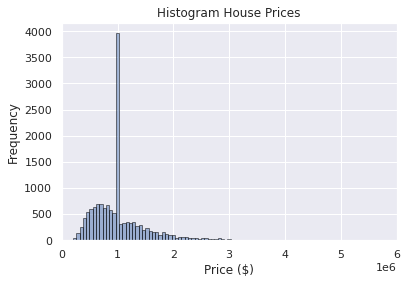

In [ ]:
# Build Histogram to visualise price distribution
num_bins = 50
n, bins, patches = plt.hist(data.Price, num_bins, color='b', alpha=0.5, histtype = 'bar', ec = 'black')
plt.ylabel ('Frequency')
plt.xlabel ('Price ($)')
plt.xlim([0, 6000000])
plt.title ('Histogram House Prices')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14808 entries, 0 to 14810
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         14808 non-null  category
 1   Address        14808 non-null  category
 2   Rooms          14808 non-null  int64   
 3   Type           14808 non-null  category
 4   Price          14808 non-null  float64 
 5   Method         14808 non-null  category
 6   SellerG        14808 non-null  category
 7   Date           14808 non-null  category
 8   Distance       14808 non-null  float64 
 9   Postcode       14808 non-null  float64 
 10  Bathroom       14808 non-null  category
 11  Car            14808 non-null  category
 12  Landsize       14808 non-null  float64 
 13  BuildingArea   14808 non-null  float64 
 14  CouncilArea    14808 non-null  category
 15  Lattitude      14808 non-null  float64 
 16  Longtitude     14808 non-null  float64 
 17  Regionname     14808 non-null  

#### Seaborn PairPlot

In [ ]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'Age'],
      dtype='object')

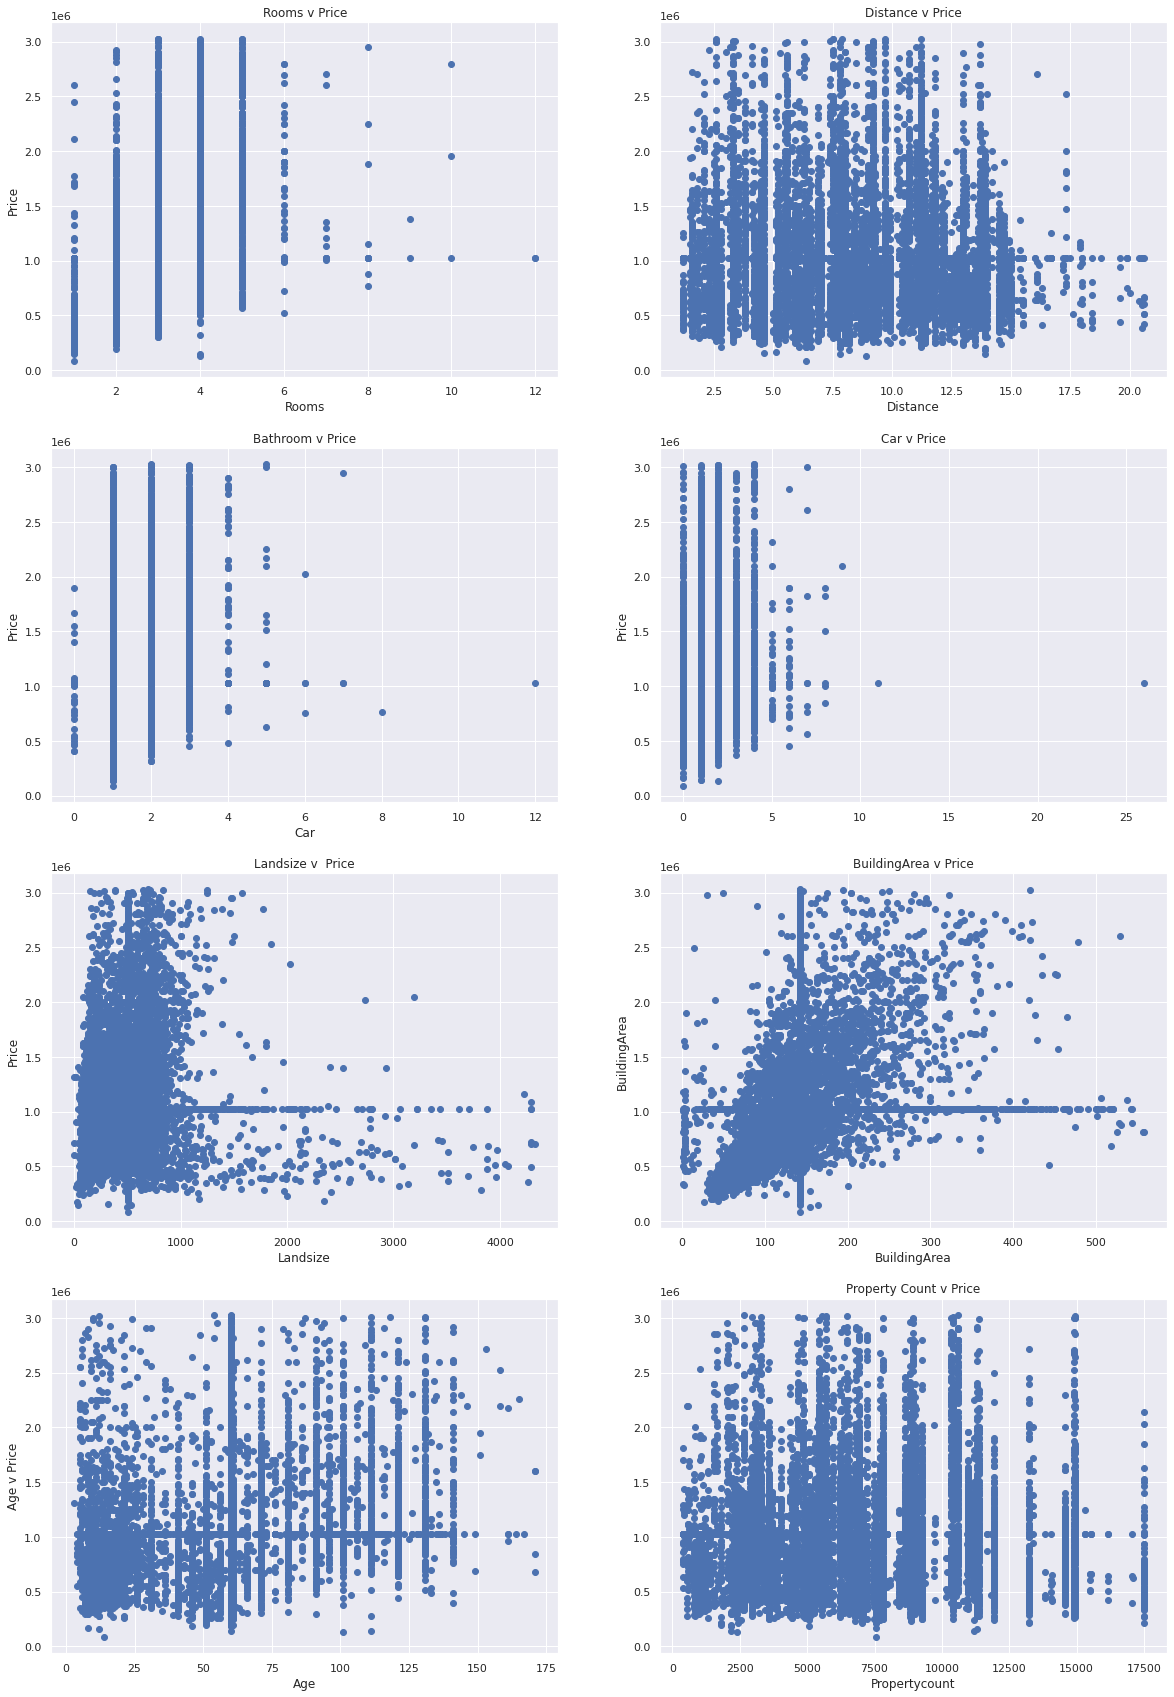

In [ ]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = data, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = data, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')
# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = data, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = data, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = data, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')
# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = data, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()

In [ ]:
sns.pairplot(data)                                        

Output hidden; open in https://colab.research.google.com to view.

#### Correlation Matrix

Text(0.5, 1.0, 'Correlation')

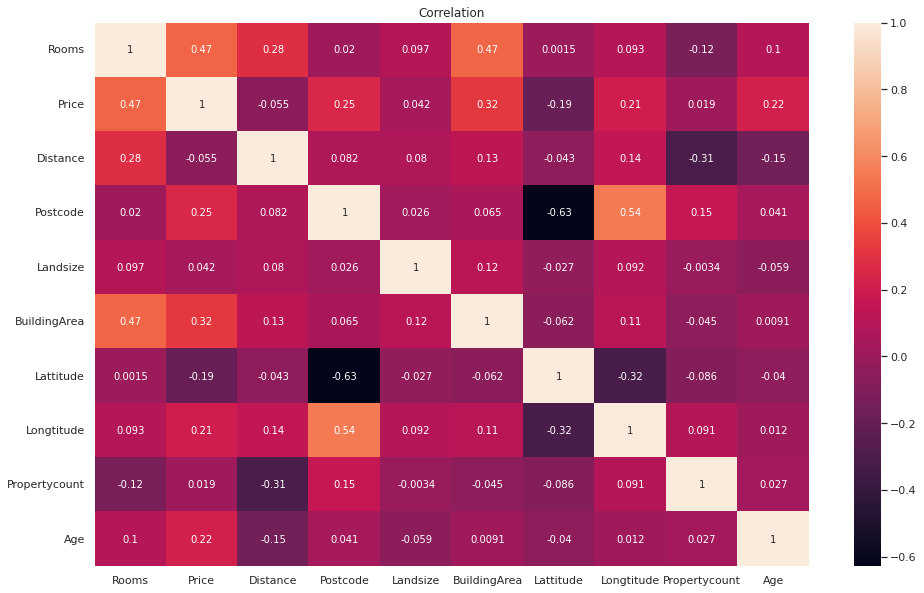

In [ ]:
# Correlation Inspection
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot= True)
plt.title('Correlation')

### Categorical Data vs Numerical Data

In [ ]:
data = data.drop(['Address', 'SellerG','Date'], axis = 1)

In [ ]:
obj_df = data.select_dtypes(include=['category']).copy()
obj_df.head()

,Suburb,Type,Method,Bathroom,Car,CouncilArea,Regionname
0,Abbotsford,h,SS,1.0,1.0,Yarra City Council,Northern Metropolitan
1,Abbotsford,h,S,1.0,1.0,Yarra City Council,Northern Metropolitan
2,Abbotsford,h,S,1.0,0.0,Yarra City Council,Northern Metropolitan
3,Abbotsford,u,VB,2.0,1.0,Yarra City Council,Northern Metropolitan
4,Abbotsford,h,SP,2.0,0.0,Yarra City Council,Northern Metropolitan


### Types of Data

In [ ]:
obj_df = data.select_dtypes(include=['category']).copy()
obj_df.head()

,Suburb,Type,Method,Bathroom,Car,CouncilArea,Regionname
0,Abbotsford,h,SS,1.0,1.0,Yarra City Council,Northern Metropolitan
1,Abbotsford,h,S,1.0,1.0,Yarra City Council,Northern Metropolitan
2,Abbotsford,h,S,1.0,0.0,Yarra City Council,Northern Metropolitan
3,Abbotsford,u,VB,2.0,1.0,Yarra City Council,Northern Metropolitan
4,Abbotsford,h,SP,2.0,0.0,Yarra City Council,Northern Metropolitan


### Label Encoder

Label Encoding is converting labels/words into numeric form.

### One-Hot Encoder

One-hot encoding is the representation of categorical variables as binary vectors.  Using one-hot encoding increases the dimensionality of the data set while label encoding doesn’t affect the dimensionality of the data set.

In [ ]:
data_encoded = pd.get_dummies(data = obj_df, drop_first= True)
data_encoded

,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,Suburb_Blackburn South,Suburb_Bonbeach,Suburb_Boronia,Suburb_Box Hill,Suburb_Braybrook,Suburb_Briar Hill,Suburb_Brighton,Suburb_Brighton East,Suburb_Broadmeadows,Suburb_Brooklyn,Suburb_Brunswick,...,Car_9.0,Car_11.0,Car_26.0,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14807,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14809,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
data.drop(['Type','Method','CouncilArea','Regionname','Suburb'], axis = 1, inplace = True)
data.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Age
0,2,1.024066e+06,2.5,3067.0,1.0,1.0,126.000000,142.74978,-37.8014,144.9958,4019.0,60.286027
1,2,1.480000e+06,2.5,3067.0,1.0,1.0,202.000000,142.74978,-37.7996,144.9984,4019.0,60.286027
2,2,1.035000e+06,2.5,3067.0,1.0,0.0,156.000000,79.00000,-37.8079,144.9934,4019.0,121.000000
3,3,1.024066e+06,2.5,3067.0,2.0,1.0,509.012439,142.74978,-37.8114,145.0116,4019.0,60.286027
4,3,1.465000e+06,2.5,3067.0,2.0,0.0,134.000000,150.00000,-37.8093,144.9944,4019.0,121.000000


In [ ]:
data = data.join(data_encoded)
data.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Age,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,...,Car_9.0,Car_11.0,Car_26.0,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1.024066e+06,2.5,3067.0,1.0,1.0,126.000000,142.74978,-37.8014,144.9958,4019.0,60.286027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,2,1.480000e+06,2.5,3067.0,1.0,1.0,202.000000,142.74978,-37.7996,144.9984,4019.0,60.286027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,2,1.035000e+06,2.5,3067.0,1.0,0.0,156.000000,79.00000,-37.8079,144.9934,4019.0,121.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,3,1.024066e+06,2.5,3067.0,2.0,1.0,509.012439,142.74978,-37.8114,145.0116,4019.0,60.286027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,3,1.465000e+06,2.5,3067.0,2.0,0.0,134.000000,150.00000,-37.8093,144.9944,4019.0,121.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14808 entries, 0 to 14810
Columns: 342 entries, Rooms to Regionname_Western Victoria
dtypes: category(2), float64(9), int64(1), uint8(330)
memory usage: 6.6 MB


## Training The Model

In [ ]:
data.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Age,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,...,Car_9.0,Car_11.0,Car_26.0,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1.024066e+06,2.5,3067.0,1.0,1.0,126.000000,142.74978,-37.8014,144.9958,4019.0,60.286027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,2,1.480000e+06,2.5,3067.0,1.0,1.0,202.000000,142.74978,-37.7996,144.9984,4019.0,60.286027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,2,1.035000e+06,2.5,3067.0,1.0,0.0,156.000000,79.00000,-37.8079,144.9934,4019.0,121.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,3,1.024066e+06,2.5,3067.0,2.0,1.0,509.012439,142.74978,-37.8114,145.0116,4019.0,60.286027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,3,1.465000e+06,2.5,3067.0,2.0,0.0,134.000000,150.00000,-37.8093,144.9944,4019.0,121.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


### Splitting the Data Into Features and Label

In [ ]:
X = data.loc[:, data.columns != 'Price']
X.head()

,Rooms,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Age,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaumaris,Suburb_Bellfield,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Berwick,Suburb_Black Rock,Suburb_Blackburn,Suburb_Blackburn North,...,Car_9.0,Car_11.0,Car_26.0,CouncilArea_Bayside City Council,CouncilArea_Boroondara City Council,CouncilArea_Brimbank City Council,CouncilArea_Cardinia Shire Council,CouncilArea_Casey City Council,CouncilArea_Darebin City Council,CouncilArea_Frankston City Council,CouncilArea_Glen Eira City Council,CouncilArea_Greater Dandenong City Council,CouncilArea_Hobsons Bay City Council,CouncilArea_Hume City Council,CouncilArea_Kingston City Council,CouncilArea_Knox City Council,CouncilArea_Macedon Ranges Shire Council,CouncilArea_Manningham City Council,CouncilArea_Maribyrnong City Council,CouncilArea_Maroondah City Council,CouncilArea_Melbourne City Council,CouncilArea_Melton City Council,CouncilArea_Monash City Council,CouncilArea_Moonee Valley City Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,2.5,3067.0,1.0,1.0,126.000000,142.74978,-37.8014,144.9958,4019.0,60.286027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,2,2.5,3067.0,1.0,1.0,202.000000,142.74978,-37.7996,144.9984,4019.0,60.286027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,2,2.5,3067.0,1.0,0.0,156.000000,79.00000,-37.8079,144.9934,4019.0,121.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,3,2.5,3067.0,2.0,1.0,509.012439,142.74978,-37.8114,145.0116,4019.0,60.286027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,3,2.5,3067.0,2.0,0.0,134.000000,150.00000,-37.8093,144.9944,4019.0,121.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
y = data['Price']
y

0        1.024066e+06
1        1.480000e+06
2        1.035000e+06
3        1.024066e+06
4        1.465000e+06
             ...     
14806    2.000000e+06
14807    1.024066e+06
14808    1.024066e+06
14809    1.024066e+06
14810    1.024066e+06
Name: Price, Length: 14808, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
'''
We are splitting our data into train-test in order to increase performance of model training
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

### Using Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
print("Accuracy of train:", clf.score(X_train, y_train))
print("Accuracy of test:", clf.score(X_test, y_test))

Accuracy of train: 0.5504430217479742
Accuracy of test: 0.5321872419982288


#### Make Predictions Via Using Our Model

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


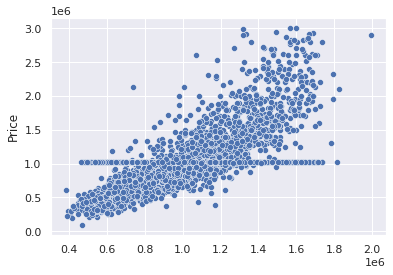

In [ ]:
y_pred = clf.predict(X_test)

fig, axes = plt.subplots()
axes = sns.scatterplot(y_pred, y_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


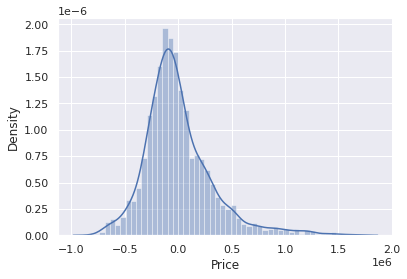

In [ ]:
fig, axes = plt.subplots()
axes = sns.distplot((y_test - y_pred))

### Comparing with other models

In [ ]:
# Imports
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

In [ ]:
# Models Object
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(max_depth = 9, min_samples_split = 4, random_state = 1)
    }
}

In [ ]:
# Add dictionary attributes
for model in models:
    models[model]['prediction'] = None
    models[model]['errors'] = {
        'mae': None,
        'mse': None,
        'rmse': None
    }
    models[model]['scores'] = {
        'r2': None
    }

In [ ]:
# Let's try our luck with a bunch of models
for model in models:
    print('Running ', models[model]['model'])
    models[model]['model'].fit(X_train, y_train)
    models[model]['predictions'] = models[model]['model'].predict(X_test)
    models[model]['errors']['mae'] = metrics.mean_absolute_error(y_test, models[model]['predictions'])
    models[model]['errors']['mse'] = metrics.mean_squared_error(y_test, models[model]['predictions'])
    models[model]['errors']['rmse'] = np.sqrt(models[model]['errors']['mse'])
    models[model]['scores']['r2'] = metrics.r2_score(y_test, models[model]['predictions'])
    print('MAE: ', models[model]['errors']['mae'])
    print('MSE: ', models[model]['errors']['mse'])
    print('RMSE: ', models[model]['errors']['rmse'])
    print('R2: ', models[model]['scores']['r2'])
    print('\n')

Running  Lasso()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.595e+14, tolerance: 2.620e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


MAE:  245102.450828939
MSE:  111946245183.27266
RMSE:  334583.6893562994
R2:  0.49244357398844063


Running  LinearRegression()
MAE:  261112312468.53635
MSE:  1.1414734613760417e+26
RMSE:  10683976138947.717
R2:  -517536063397717.56


Running  Ridge()
MAE:  244591.64638299277
MSE:  111359743925.40538
RMSE:  333706.0741511988
R2:  0.49510272956625434


Running  ElasticNet()
MAE:  268184.692617643
MSE:  134531576121.27463
RMSE:  366785.46334509307
R2:  0.3900432671946451


Running  KNeighborsRegressor()
MAE:  265298.07152655016
MSE:  143318563783.29868
RMSE:  378574.38342193555
R2:  0.3502036812769299


Running  RandomForestRegressor()
MAE:  217539.76304918263
MSE:  102940092219.89104
RMSE:  320842.784272751
R2:  0.5332768400146818


Running  GradientBoostingRegressor()
MAE:  231883.27697340513
MSE:  103176447928.18272
RMSE:  321210.9087938682
R2:  0.5322052198065045


Running  AdaBoostRegressor(learning_rate=1.2, loss='exponential', n_estimators=5,
                  random_state=2)
MAE:

### Visualize and Analyse The Predictions To Indicate Model Performance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


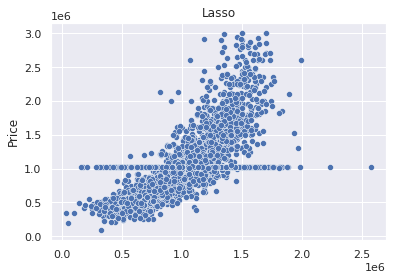

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


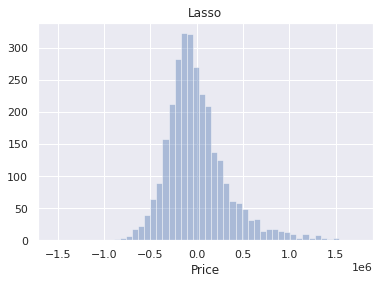

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


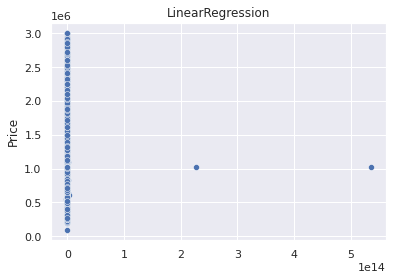

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


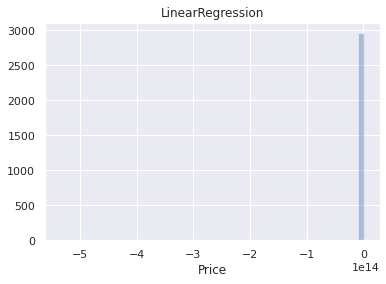

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


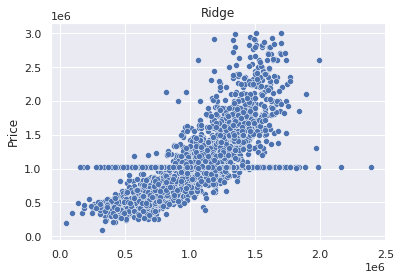

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


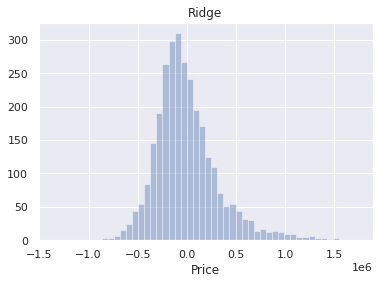

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


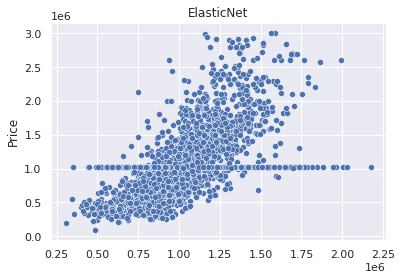

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


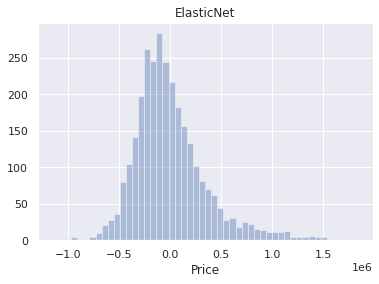

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


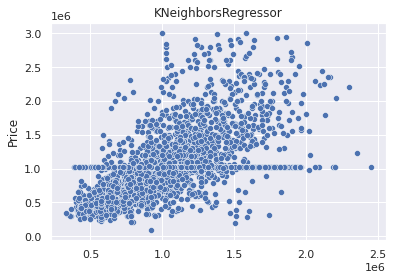

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


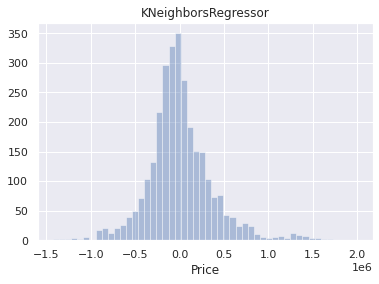

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


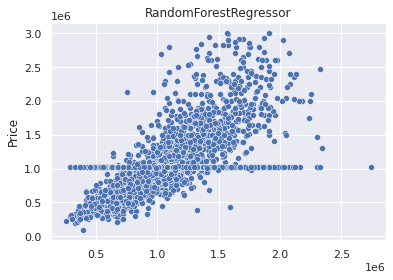

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


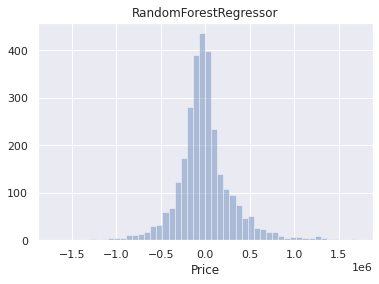

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


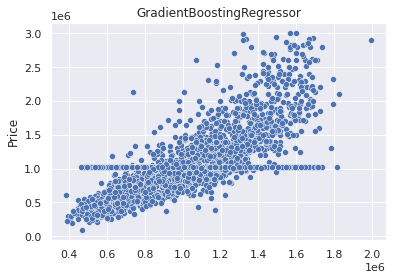

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


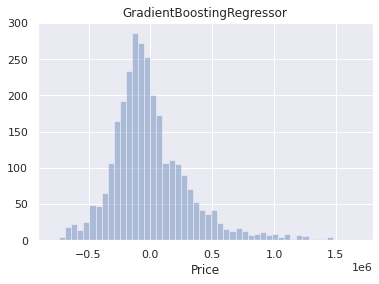

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


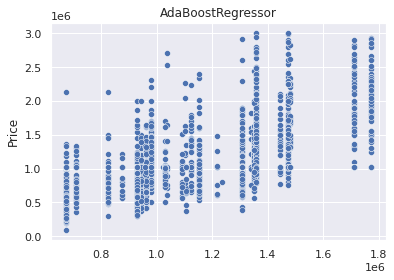

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


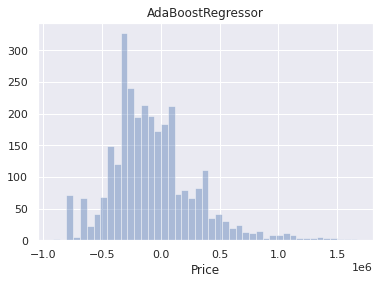

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


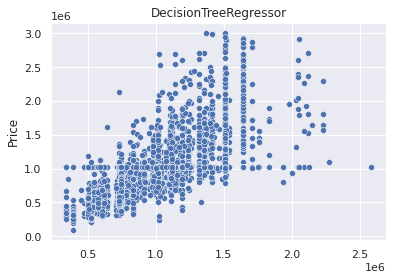

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


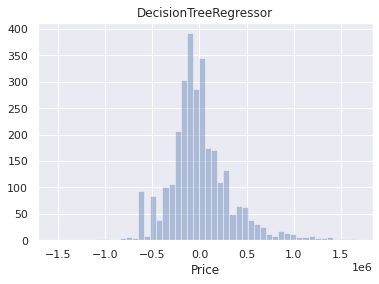

In [ ]:
# Analyse the Residuals
for index, model in enumerate(models):
    sns.scatterplot(models[model]['predictions'], y_test)
    plt.title(model)
    plt.show()
    sns.distplot((y_test - models[model]['predictions']),kde=False)
    plt.title(model)
    plt.show()